# Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

As before, we can change rcParams, to list all of them just call the plt.rcParams.keys() method of the dictionary.

In [2]:
#plt.rcParams.keys()

In [3]:
try:
    from cycler import cycler
except:
    pass
plt.rcParams['patch.linewidth'] = 0.5
plt.rcParams['patch.antialiased'] = True
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['axes.labelcolor'] =  '555555'
colorlist = ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']
try:
    # newer Matplotlib 
    plt.rcParams['axes.prop_cycle'] = cycler('color', colorlist)
except:
    # older Matplotlib (<1.5 I think)
    plt.rcParams['axes.color_cycle'] = colorlist
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.linestyle'] =  '-'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.default'] = 'regular'

Same as before

In [4]:
import astropy
import astropy.coordinates as coordinates
import astropy.units as u

import astropy.constants as c
from astropy.table import Table

# Plotting images

## Popular packages

    -WCSAxes
    http://wcsaxes.readthedocs.org/
      
    - APLpy
    https://aplpy.github.io/
    http://aplpy.readthedocs.org/
    
    -PyWCSGrid2 (discontinued!)
    http://leejjoon.github.io/pywcsgrid2/

In [5]:
from astropy.wcs import WCS
from astropy.io import fits
import aplpy

## Read in the data

All data set are from the WCSAxes and Aplpy documentation.

In [6]:
hdu_msx = fits.open('data/msx.fits')[0]
wcs_msx = WCS(hdu_msx.header)

hdu_l1558_13co = fits.open('data/l1558_13co.fits')[0]
wcs_l1558_13co = WCS(hdu_l1558_13co.header)

hdu_bolocam = fits.open('data/bolocam.fits')[0]
wcs_bolocam = WCS(hdu_bolocam.header)

hdu_rosat = fits.open('data/rosat.fits')[0]
wcs_rosat = WCS(hdu_rosat.header)

hdu_2mass = fits.open('data/2mass_k.fits')[0]
wcs_2mass = WCS(hdu_2mass.header)


## aplpy

Aplpy has a rather different approach than the other packages. It has its own commands for most things. Each plot is a layer.

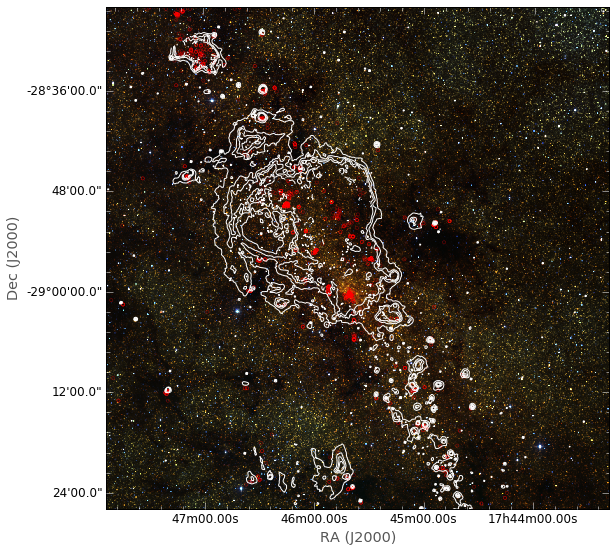

In [7]:
gc = aplpy.FITSFigure('data/2mass_k.fits')
gc.show_rgb('data/2MASS_arcsinh_color.png')

gc.show_contour('data/mips_24micron.fits', colors='white')

data = np.loadtxt('data/yso_wcs_only.txt')
ra, dec = data[:, 0], data[:, 1]

gc.show_markers(ra, dec, layer='marker_set_1', edgecolor='r',
                facecolor='none', marker='o', s=10, alpha=0.5)


We can also slice data, for image cubes this is very convenient. The $^{13}$CO data for L1558 is a data cube.

INFO: Auto-setting vmin to -5.371e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.660e+00 [aplpy.core]


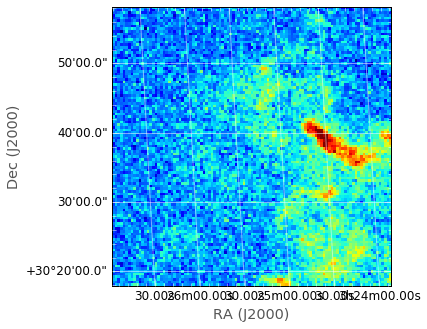

In [8]:
f = aplpy.FITSFigure('data/l1558_13co.fits', slices=[2],
                     figsize=(5,5))
f.show_colorscale()
f.add_grid()

Since we can also change the slicing, we can quickly create a PV-diagram.

INFO: Auto-setting vmin to -5.973e-01 [aplpy.core]
INFO: Auto-setting vmax to  3.503e+00 [aplpy.core]


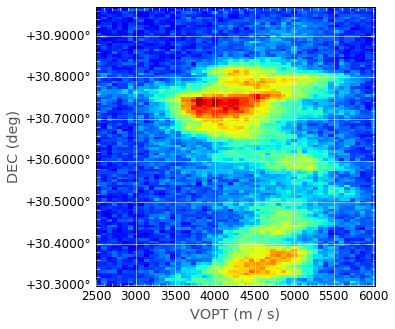

In [9]:
f = aplpy.FITSFigure('data/l1558_13co.fits', dimensions=[2, 1],
                     slices=[50], figsize=(5,5))
f.show_colorscale(aspect='auto')
f.add_grid()
#ax.tick_labels.set_xformat('%.1f');

## Exercise

    - Add contours to the  L1558 maps.
    - Change the coordinate display system.
    - Change the color map the L1558 maps.

## WCSAxes

WCSAxes is intended as a replacement for both APLpy, PyWCSGrid2, trying to take the best from both and is developed by many of the same people. It ties into Matplotlib just like pywcsgrid2.

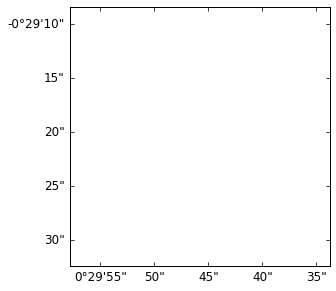

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection=wcs_msx)

Now we have an axes object just like we usually do with Matplotlib. This is much more convenient, since you do not have to learn special methods and objects, just to change things in the plot.

We can first check the histogram of the whole image, to see what range in values we have.

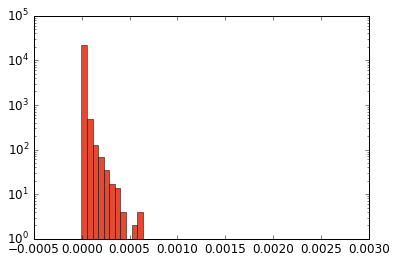

In [11]:
_ = plt.hist(hdu_msx.data.flatten(),bins=50);
plt.yscale('log')

In [12]:
np.nanmax(hdu_bolocam.data.flatten())

9.8875465

In [13]:
hdu_bolocam.data.shape

(638, 640)

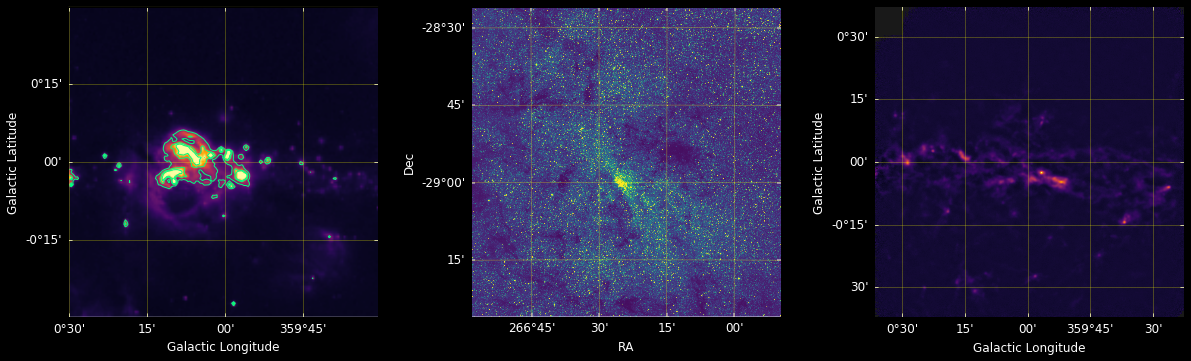

In [30]:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(20,15))

    ax1 = fig.add_subplot(131, projection=wcs_msx)
    ax1.imshow(hdu_msx.data, vmin=-1e-5, vmax=2.e-4, cmap=plt.cm.inferno,
              origin='lower')
    ax1.contour(hdu_msx.data, 
                levels=np.linspace(-1e-5,2e-4,4), 
                colors=plt.cm.winter_r(np.linspace(-1e-5,2e-4,4)))

    ax1.coords['glon'].set_ticks(color='white')
    ax1.coords['glat'].set_ticks(color='white')

    ax1.coords['glon'].set_axislabel('Galactic Longitude')
    ax1.coords['glat'].set_axislabel('Galactic Latitude')
    ax1.coords.grid(color='yellow', linestyle='solid', alpha=0.5)



    ax2 = fig.add_subplot(132, projection=wcs_2mass)
    ax2.imshow(hdu_2mass.data, vmin=450, vmax=1e3, cmap=plt.cm.viridis,
              origin='lower')


    ax2.coords['ra'].set_ticks(color='white')
    ax2.coords['dec'].set_ticks(color='white')

    ax2.coords['ra'].set_axislabel('RA')
    ax2.coords['dec'].set_axislabel('Dec')
    ax2.coords.grid(color='yellow', linestyle='solid', alpha=0.5)


    ax3 = fig.add_subplot(133, projection=wcs_bolocam)
    import matplotlib
    cmap = matplotlib.cm.inferno
    cmap.set_bad('0.1',1.)

    ax3.imshow(hdu_bolocam.data, vmin=-1, vmax=10, cmap=cmap,
              origin='lower')

    ax3.set_xlim(10,628)
    ax3.set_ylim(10,630)

    ax3.coords['glon'].set_ticks(color='white')
    ax3.coords['glat'].set_ticks(color='white')

    ax3.coords['glon'].set_axislabel('Galactic Longitude')
    ax3.coords['glat'].set_axislabel('Galactic Latitude')
    ax3.coords.grid(color='yellow', linestyle='solid', alpha=0.5)

    fig.subplots_adjust(wspace=0.3)


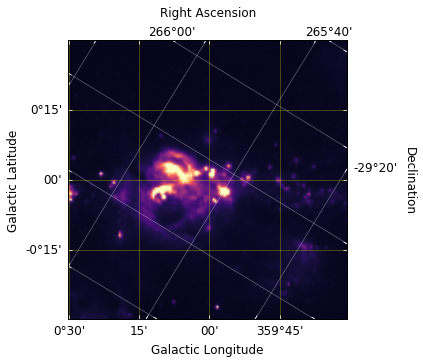

In [15]:
fig = plt.figure(figsize=(6,5))

ax = fig.add_subplot(111, projection=wcs_msx)
ax.imshow(hdu_msx.data, 
          vmin=-1e-5, vmax=2.e-4, 
          cmap=plt.cm.magma,
          origin='lower')
overlay = ax.get_coords_overlay('fk5')


ax.coords['glon'].set_ticks(color='white')
ax.coords['glat'].set_ticks(color='white')

ax.coords['glon'].set_axislabel('Galactic Longitude')
ax.coords['glat'].set_axislabel('Galactic Latitude')

ax.coords.grid(color='yellow', linestyle='solid', alpha=0.5)

overlay['ra'].set_ticks(color='white')
overlay['dec'].set_ticks(color='white')

overlay['ra'].set_axislabel('Right Ascension')
overlay['dec'].set_axislabel('Declination')

overlay.grid(color='white', linestyle='solid', alpha=0.5)

### Exercise

    - Mark some coordinates of interest in the map.
    - Try different color maps.
    - Try different vmin and vmax.
    - Change coordinates to Equatorial.\
    - Add axis labels

### A more complicated figure

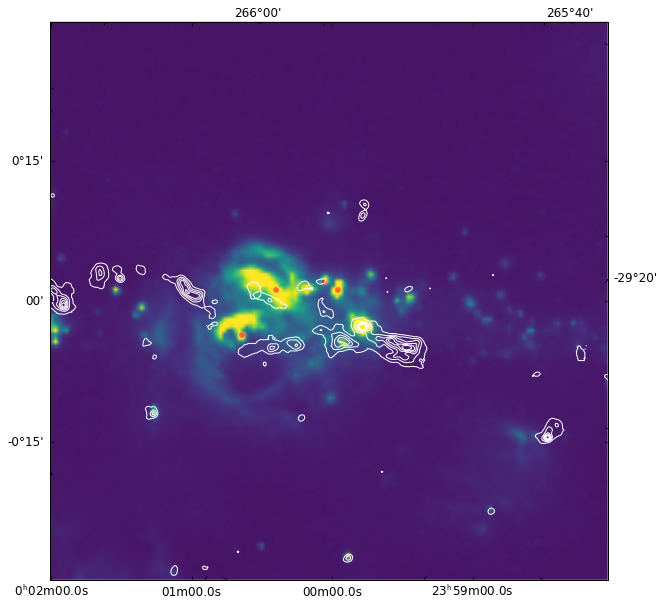

In [16]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection=wcs_msx)
ax.imshow(hdu_msx.data, vmin=-1e-5, vmax=2.e-4, cmap=plt.cm.viridis,
          origin='lower')

# change display of coordinates
xcoord = ax.coords[0]
ycoord = ax.coords[1]
xcoord.set_ticks(number=4)
xcoord.set_major_formatter('hh:mm:ss.s')
xcoord.set_separator(('$^{\sf h}$', "m", 's'))

# add contours from a different data set
ax.contour(hdu_bolocam.data, transform=ax.get_transform(WCS(hdu_bolocam.header)),
           levels=[1,2,3,4,5,6], colors='white');

# mark some points of interest
tr_gal = ax.get_transform("galactic")
l = [-0.01, 0.015, 0.10, 0.16]
b = [0.02, 0.035, 0.02, -0.06]
ax.scatter(l, b, transform=tr_gal, s=40,
           edgecolor='white', facecolor='r', alpha=0.5)

# overlay a second coordinate system.
overlay = ax.get_coords_overlay('fk5')

ax.set_xlim(-0.5, 148.5)
ax.set_ylim(-0.5, 148.5);

### Exercise

    - Change images, and overlay different layers of the L1558 $^{13}$CO cube as contours with different colors.
    - Change contour colors.
    - If you have your own data, load that in and display it.
    - Add axis labels.

## ROSAT

All sky plots again...

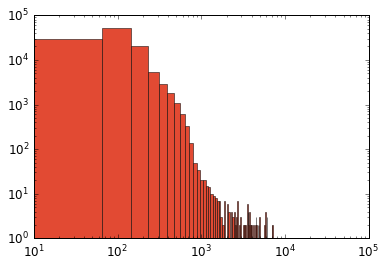

In [17]:
plt.hist(hdu_rosat.data.flatten(), bins=500)
plt.yscale('log')
plt.xscale('log')

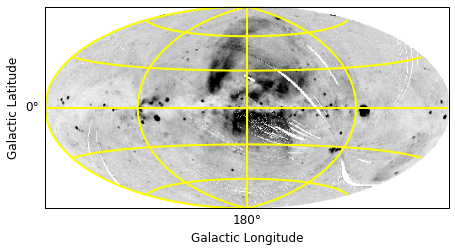

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0.15, 0.1, 0.8, 0.8], projection=wcs_rosat)
ax.imshow(hdu_rosat.data, vmin=0, vmax=6e2, cmap=plt.cm.gray_r,
          origin='lower');
overlay = ax.get_coords_overlay('fk5')
ax.coords['glon'].set_ticks(color='white')
ax.coords['glat'].set_ticks(color='white')

ax.coords['glon'].set_axislabel('Galactic Longitude')
ax.coords['glat'].set_axislabel('Galactic Latitude')

ax.coords.grid(color='yellow', linestyle='solid', alpha=1, lw=2)

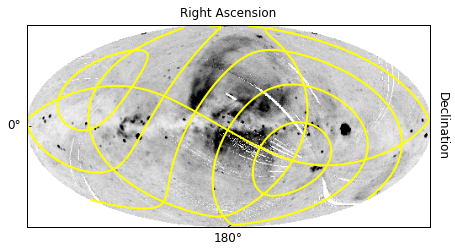

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0.15, 0.1, 0.8, 0.8], projection=wcs_rosat)
ax.imshow(hdu_rosat.data, vmin=0, vmax=6e2, cmap=plt.cm.gray_r,
          origin='lower');
overlay = ax.get_coords_overlay('fk5')

overlay['ra'].set_ticks(color='white')
overlay['dec'].set_ticks(color='white')

overlay['ra'].set_axislabel('Right Ascension')
overlay['dec'].set_axislabel('Declination')

overlay.grid(color='yellow', linestyle='solid', alpha=1, lw=2)

### Exercise

 - Get the 2 MASS catalog from previous session and plot the galaxies over the ROSAT data.
 - Change colors and labels to something nicer.
 - Look at the other data sets that we have loaded at the top create plots for them too.

# Spectral cubes

In [20]:
import spectral_cube as sp

In [21]:
data = sp.SpectralCube.read('data/l1558_13co.fits')

In [22]:
data

SpectralCube with shape=(53, 105, 105):
 n_x:    105  type_x: RA---SFL  unit_x: deg    range:    50.924417 deg:   51.740103 deg
 n_y:    105  type_y: DEC--SFL  unit_y: deg    range:    30.301945 deg:   30.966389 deg
 n_s:     53  type_s: VOPT      unit_s: m / s  range:     2528.195 m / s:    5982.223 m / s

In [23]:
data.spectral_axis.to(u.km/u.s)

<Quantity [ 2.5281949 , 2.59461851, 2.66104212, 2.72746573, 2.79388934,
            2.86031295, 2.92673656, 2.99316017, 3.05958378, 3.12600739,
            3.192431  , 3.25885461, 3.32527822, 3.39170183, 3.45812544,
            3.52454905, 3.59097266, 3.65739627, 3.72381988, 3.79024349,
            3.8566671 , 3.92309071, 3.98951432, 4.05593793, 4.12236154,
            4.18878515, 4.25520876, 4.32163237, 4.38805598, 4.45447959,
            4.5209032 , 4.58732681, 4.65375042, 4.72017403, 4.78659764,
            4.85302125, 4.91944486, 4.98586847, 5.05229208, 5.11871569,
            5.1851393 , 5.25156291, 5.31798652, 5.38441013, 5.45083374,
            5.51725735, 5.58368096, 5.65010457, 5.71652818, 5.78295179,
            5.8493754 , 5.91579901, 5.98222262] km / s>

In [24]:
data.shape

(53, 105, 105)

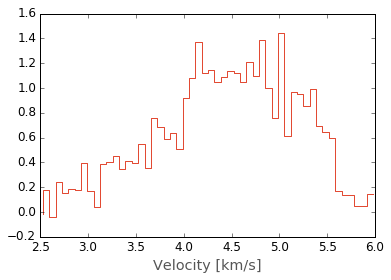

In [26]:
plt.step(data.spectral_axis.to(u.km/u.s), data[:,50,50])
plt.xlabel('Velocity [km/s]')
# there's no unit for the data. :(
plt.ylabel(data.unit);

In [43]:
data.moment0().value.shape


(105, 105)

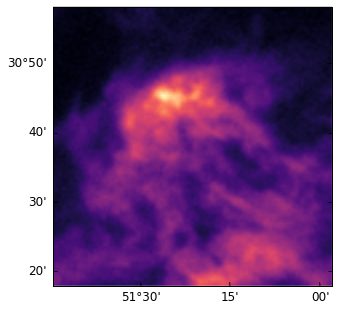

In [50]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection=WCS(data.moment0().hdu.header))
ax.imshow(data.moment0().value,  
          cmap=plt.cm.magma,
          origin='lower');